# Importing--- Cleaning

In [475]:
import pandas as pd
import numpy as np
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima,ARIMA,model_selection
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error,mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import levene
from scipy import stats
import math
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

In [476]:
df=pd.read_csv('global_internet_adoption_daily_2010_2025.csv')

In [477]:
df

,Country,Date,Internet_Penetration (%),Broadband_Speed (Mbps),GDP_Per_Capita (USD),Education_Level (%),Mobile_Data_Usage (GB),Digital_Investment (M USD),Digital_Literacy (%),X_Sentiment_Score,5G_Rollout,Urban_Rural,Latitude,Longitude
0,USA,2010-01-01,25.45,5.23,20339.01,47.17,0.26,428.95,85.29,0.77,0,Rural,37.0902,-95.7129
1,USA,2010-01-02,47.88,9.57,20332.14,46.71,0.54,441.28,85.41,-0.49,0,Urban,37.0902,-95.7129
2,USA,2010-01-03,46.46,9.71,20319.72,46.75,0.64,447.51,85.32,-0.24,0,Urban,37.0902,-95.7129
3,USA,2010-01-04,46.80,9.73,20334.79,47.09,0.53,438.25,85.23,-0.66,0,Urban,37.0902,-95.7129
4,USA,2010-01-05,46.91,9.71,20377.81,46.96,0.56,436.41,85.79,-0.21,0,Urban,37.0902,-95.7129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56355,South Africa,2025-06-02,96.67,122.60,9927.28,38.71,10.27,1644.72,62.14,0.53,1,Urban,-30.5595,22.9375
56356,South Africa,2025-06-03,97.85,122.69,9987.56,39.21,10.45,1639.97,62.65,-0.60,1,Urban,-30.5595,22.9375
56357,South Africa,2025-06-04,97.23,122.66,10046.64,39.06,10.27,1624.73,62.53,0.94,1,Urban,-30.5595,22.9375
56358,South Africa,2025-06-05,97.30,122.69,10022.64,39.06,10.36,1645.58,62.41,-0.64,1,Urban,-30.5595,22.9375


In [478]:
df['Date'].min()

'2010-01-01'

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56360 entries, 0 to 56359
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     56360 non-null  object 
 1   Date                        56360 non-null  object 
 2   Internet_Penetration (%)    56360 non-null  float64
 3   Broadband_Speed (Mbps)      56360 non-null  float64
 4   GDP_Per_Capita (USD)        56360 non-null  float64
 5   Education_Level (%)         56360 non-null  float64
 6   Mobile_Data_Usage (GB)      56360 non-null  float64
 7   Digital_Investment (M USD)  56360 non-null  float64
 8   Digital_Literacy (%)        56360 non-null  float64
 9   X_Sentiment_Score           56360 non-null  float64
 10  5G_Rollout                  56360 non-null  int64  
 11  Urban_Rural                 56360 non-null  object 
 12  Latitude                    56360 non-null  float64
 13  Longitude                   563

In [480]:
df['Date']=pd.to_datetime(df['Date'])

In [481]:
df[df.duplicated()]

,Country,Date,Internet_Penetration (%),Broadband_Speed (Mbps),GDP_Per_Capita (USD),Education_Level (%),Mobile_Data_Usage (GB),Digital_Investment (M USD),Digital_Literacy (%),X_Sentiment_Score,5G_Rollout,Urban_Rural,Latitude,Longitude


In [482]:
df.drop(['Latitude','Longitude'],axis=1,inplace=True)

# ¿Qué factores determinan el ritmo de adopción de Internet en países desarrollados y en desarrollo, y cuáles son las probabilidades condicionales de que superen el 95 % de penetración antes de 2025, dadas sus condiciones socioeconómicas y de inversión digital?"

## -----Analisis de los  Paises desarollados vs paises no desarollados----

### 1. entendiendo ambos grupos

In [486]:
df['Country'].unique()

array(['USA', 'India', 'Brazil', 'Nigeria', 'Indonesia', 'Ethiopia',
       'China', 'Kenya', 'Germany', 'South Africa'], dtype=object)

In [487]:
desarrollados = ['USA', 'Germany']
en_desarrollo = ['India', 'Brazil', 'Nigeria', 'Indonesia', 'Ethiopia', 'China', 'Kenya', 'South Africa']

In [488]:
paises_desarollados=df[df['Country'].isin(['USA', 'Germany'])]
paises_en_desarollo=df[df['Country'].isin(['India', 'Brazil', 'Nigeria', 'Indonesia', 'Ethiopia', 'China', 'Kenya', 'South Africa'])]

In [489]:
paises_desarollados['Internet_Penetration (%)'].describe()

count    11272.000000
mean        70.701282
std         23.430270
min         24.120000
25%         52.397500
50%         69.920000
75%         94.352500
max        100.000000
Name: Internet_Penetration (%), dtype: float64

In [490]:
print(f'Coeficiente de variacion paises_desarollados:{(23.430270/70.701282)*100}')

Coeficiente de variacion paises_desarollados:33.13980926116729


In [491]:
paises_en_desarollo['Internet_Penetration (%)'].describe()

count    45088.00000
mean        53.71672
std         28.22167
min          7.28000
25%         29.65000
50%         49.98000
75%         84.79000
max        100.00000
Name: Internet_Penetration (%), dtype: float64

In [492]:
print(f'Coeficiente de variacion paises_en_desarollo:{(28.22167/53.71672)*100}')

Coeficiente de variacion paises_en_desarollo:52.53796210937674


In [493]:
paises_desarollados.set_index('Date',inplace=True)
paises_en_desarollo.set_index('Date',inplace=True)

In [494]:
print(paises_desarollados.index.is_monotonic_increasing)
print(paises_en_desarollo.index.is_monotonic_increasing)

False
False


##### el index no esta ascendentemente--cronologicamente pocisionado por que cada pais tiene su rango de fechas 

In [496]:
paises_desarollados['grupo'] = 'Desarrollado'
paises_en_desarollo['grupo'] = 'En desarrollo'

C:\Users\Nicol\AppData\Local\Temp\ipykernel_9952\605969570.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nicol\AppData\Local\Temp\ipykernel_9952\605969570.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [497]:
# funcion para sacar el coeficiente de variacion
def cv(x):
    return (np.std(x) / np.mean(x)) * 100 if np.mean(x) != 0 else np.nan

In [498]:
resultados_desarollados = paises_desarollados.groupby('grupo').resample('YE')['Internet_Penetration (%)'].agg(
    ['mean', 'median', 'std', cv]).reset_index()

In [499]:
resultados_desarollados

,grupo,Date,mean,median,std,cv
0,Desarrollado,2010-12-31,40.123123,46.710,10.070574,25.081980
1,Desarrollado,2011-12-31,45.624356,52.450,11.013279,24.122496
2,Desarrollado,2012-12-31,49.910232,58.240,12.580880,25.189792
3,Desarrollado,2013-12-31,55.884507,64.120,13.405194,23.970883
4,Desarrollado,2014-12-31,60.402877,69.800,14.785438,24.461265
5,Desarrollado,2015-12-31,64.888055,75.350,16.076528,24.758815
6,Desarrollado,2016-12-31,70.765710,80.520,16.474660,23.264661
7,Desarrollado,2017-12-31,72.595890,85.280,18.531406,25.509307
8,Desarrollado,2018-12-31,78.235041,89.710,18.657142,23.831213
9,Desarrollado,2019-12-31,80.726863,93.635,19.929799,24.671024


In [500]:
resultados_no_desarollados = paises_en_desarollo.groupby('grupo').resample('YE')['Internet_Penetration (%)'].agg(
    ['mean', 'median', 'std', cv]).reset_index()

In [501]:
resultados_no_desarollados

,grupo,Date,mean,median,std,cv
0,En desarrollo,2010-12-31,15.978041,14.640,9.985426,62.483980
1,En desarrollo,2011-12-31,19.947312,18.860,11.016861,55.220345
2,En desarrollo,2012-12-31,24.558535,23.970,11.852570,48.254288
3,En desarrollo,2013-12-31,29.644784,29.950,12.397322,41.812410
4,En desarrollo,2014-12-31,37.274695,39.260,12.782840,34.287742
5,En desarrollo,2015-12-31,41.406010,44.080,13.572648,32.773801
6,En desarrollo,2016-12-31,47.762312,51.820,14.628243,30.621937
7,En desarrollo,2017-12-31,54.166521,59.570,15.350225,28.334100
8,En desarrollo,2018-12-31,60.102993,66.970,15.959575,26.549164
9,En desarrollo,2019-12-31,65.759318,73.750,17.151818,26.078252


In [502]:
df

,Country,Date,Internet_Penetration (%),Broadband_Speed (Mbps),GDP_Per_Capita (USD),Education_Level (%),Mobile_Data_Usage (GB),Digital_Investment (M USD),Digital_Literacy (%),X_Sentiment_Score,5G_Rollout,Urban_Rural
0,USA,2010-01-01,25.45,5.23,20339.01,47.17,0.26,428.95,85.29,0.77,0,Rural
1,USA,2010-01-02,47.88,9.57,20332.14,46.71,0.54,441.28,85.41,-0.49,0,Urban
2,USA,2010-01-03,46.46,9.71,20319.72,46.75,0.64,447.51,85.32,-0.24,0,Urban
3,USA,2010-01-04,46.80,9.73,20334.79,47.09,0.53,438.25,85.23,-0.66,0,Urban
4,USA,2010-01-05,46.91,9.71,20377.81,46.96,0.56,436.41,85.79,-0.21,0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
56355,South Africa,2025-06-02,96.67,122.60,9927.28,38.71,10.27,1644.72,62.14,0.53,1,Urban
56356,South Africa,2025-06-03,97.85,122.69,9987.56,39.21,10.45,1639.97,62.65,-0.60,1,Urban
56357,South Africa,2025-06-04,97.23,122.66,10046.64,39.06,10.27,1624.73,62.53,0.94,1,Urban
56358,South Africa,2025-06-05,97.30,122.69,10022.64,39.06,10.36,1645.58,62.41,-0.64,1,Urban


In [503]:
df['Year'] = df['Date'].dt.year

In [504]:
df_grouped = df.groupby(['Country', 'Year'], as_index=False)['Internet_Penetration (%)'].mean()

In [505]:
df_grouped

,Country,Year,Internet_Penetration (%)
0,Brazil,2010,12.806027
1,Brazil,2011,16.179918
2,Brazil,2012,21.412705
3,Brazil,2013,25.947342
4,Brazil,2014,34.203342
...,...,...,...
155,USA,2021,85.823425
156,USA,2022,85.469233
157,USA,2023,86.805836
158,USA,2024,88.217678


In [506]:
# Lista de países
countries = df_grouped['Country'].unique()
n = len(countries)

# Definimos tamaño de la grilla de subplots
cols = 2 
rows =  math.ceil(n / cols)

# Crear figura con subplots
fig = make_subplots(rows=rows, cols=cols,
                    subplot_titles=countries)

# Añadir una línea por país
for i, country in enumerate(countries):
    row = i // cols + 1
    col_pos = i % cols + 1
    df_country = df_grouped[df_grouped['Country'] == country]

    fig.add_trace(
        go.Scatter(
            x=df_country['Year'],
            y=df_country['Internet_Penetration (%)'],
            mode='lines+markers',
            name=country,
            showlegend=False
        ),
        row=row,
        col=col_pos
    )

fig.update_layout(
    height=300 * rows,
    width=900,
    title_text="Internet Adoption Over Time by Country",
    template='plotly_white',
    xaxis_title='Year',
    yaxis_title='Internet Penetration (%)'
)

fig.show()

In [507]:
pendientes = df.groupby('Country').apply(
    lambda group: (group['Internet_Penetration (%)'].iloc[-1] - group['Internet_Penetration (%)'].iloc[0]) / 
                  (group['Year'].iloc[-1] - group['Year'].iloc[0])
).reset_index(name='Pendiente_promedio')

# Ordenamos de mayor a menor
pendientes = pendientes.sort_values(by='Pendiente_promedio', ascending=False)

print(pendientes)

        Country  Pendiente_promedio
2      Ethiopia            5.978000
6         Kenya            5.964000
0        Brazil            5.529333
5     Indonesia            5.504667
4         India            5.486000
8  South Africa            5.449333
1         China            4.974000
9           USA            4.970000
7       Nigeria            2.538000
3       Germany            0.808667


C:\Users\Nicol\AppData\Local\Temp\ipykernel_9952\3707884787.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



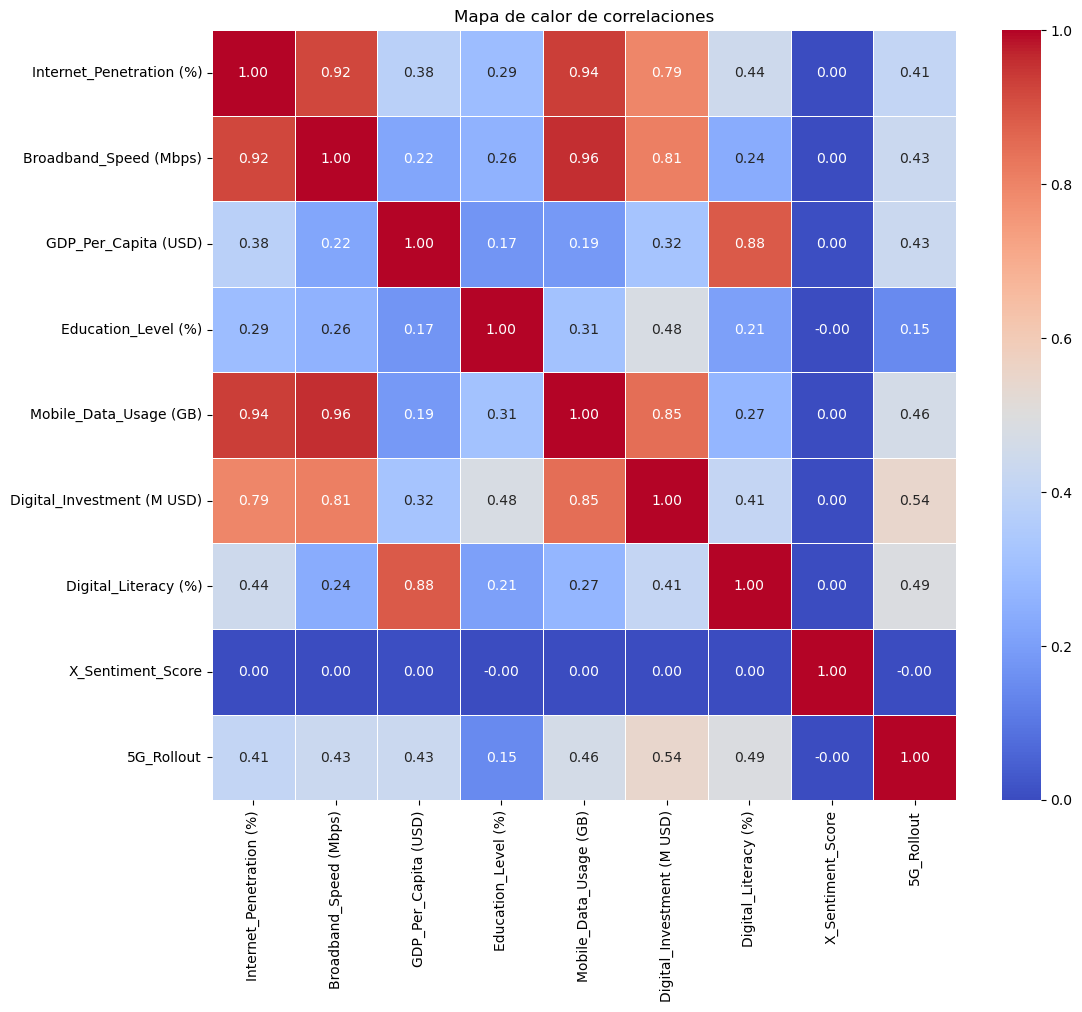

In [508]:
df_correlation=df[['Internet_Penetration (%)','Broadband_Speed (Mbps)','GDP_Per_Capita (USD)','Education_Level (%)','Mobile_Data_Usage (GB)','Digital_Investment (M USD)','Digital_Literacy (%)','X_Sentiment_Score','5G_Rollout']]
df_correlation=df_correlation.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(df_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor de correlaciones')
plt.savefig('mapa_calor_correlaciones.png', dpi=300, bbox_inches='tight') 
plt.show()

### 2. que tan diferentes son ambos grupos

#### validacion de supuestos

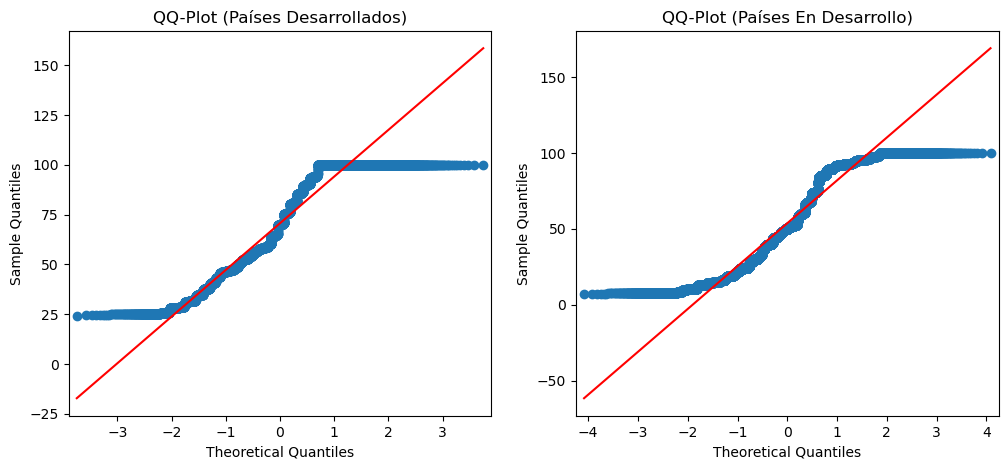

In [511]:
# QQ-Plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sm.qqplot(paises_desarollados['Internet_Penetration (%)'], line='s', ax=plt.gca())
plt.title("QQ-Plot (Países Desarrollados)")

plt.subplot(1, 2, 2)
sm.qqplot(paises_en_desarollo['Internet_Penetration (%)'], line='s', ax=plt.gca())
plt.title("QQ-Plot (Países En Desarrollo)")
plt.show()

##### no hay normalidad pero tlc nos respalda para hacer la prueba t-student

In [513]:
paises_en_desarollo

,Country,Internet_Penetration (%),Broadband_Speed (Mbps),GDP_Per_Capita (USD),Education_Level (%),Mobile_Data_Usage (GB),Digital_Investment (M USD),Digital_Literacy (%),X_Sentiment_Score,5G_Rollout,Urban_Rural,grupo
Date,,,,,,,,,,,,
2010-01-01,India,15.10,2.24,5641.06,53.70,0.32,174.83,56.84,-0.03,0,Urban,En desarrollo
2010-01-02,India,7.80,1.24,5613.14,53.94,0.25,157.96,56.79,0.62,0,Rural,En desarrollo
2010-01-03,India,15.10,2.32,5594.72,53.55,0.41,166.46,57.20,-0.23,0,Urban,En desarrollo
2010-01-04,India,14.41,2.25,5670.50,53.63,0.38,158.36,56.91,0.93,0,Urban,En desarrollo
2010-01-05,India,8.27,1.25,5562.43,53.64,0.22,163.30,56.84,0.96,0,Rural,En desarrollo
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-02,South Africa,96.67,122.60,9927.28,38.71,10.27,1644.72,62.14,0.53,1,Urban,En desarrollo
2025-06-03,South Africa,97.85,122.69,9987.56,39.21,10.45,1639.97,62.65,-0.60,1,Urban,En desarrollo
2025-06-04,South Africa,97.23,122.66,10046.64,39.06,10.27,1624.73,62.53,0.94,1,Urban,En desarrollo


In [514]:
levene_test = levene(
    paises_desarollados['Internet_Penetration (%)'],
    paises_en_desarollo['Internet_Penetration (%)']
)
print(f"Test de Levene: p-valor = {levene_test.pvalue:.4f}")

if levene_test.pvalue > 0.05:
    print("Varianzas iguales (usar t-test estándar)")
else:
    print("Varianzas desiguales (usar Welch's t-test)")

Test de Levene: p-valor = 0.0000
Varianzas desiguales (usar Welch's t-test)


In [515]:
# Opción 1: Varianzas iguales
if levene_test.pvalue > 0.05:
    t_stat, p_value = ttest_ind(
        paises_desarollados['Internet_Penetration (%)'],
        paises_en_desarollo['Internet_Penetration (%)'],
        equal_var=True
    )
# Opción 2: Varianzas desiguales (Welch)
else:
    t_stat, p_value = ttest_ind(
        paises_desarollados['Internet_Penetration (%)'],
        paises_en_desarollo['Internet_Penetration (%)'],
        equal_var=False
    )

print(f"Estadístico t = {t_stat:.3f}, p-valor = {p_value:.10f}")

if p_value < 0.05:
    print("Resultado: Existe evidencia estadísticamente significativa de diferencia entre grupos (p value = {:.4f})".format(p_value))
else:
    print("Resultado: No se encontró evidencia suficiente para afirmar una diferencia significativa (p value = {:.4f})".format(p_value))

Estadístico t = 65.929, p-valor = 0.0000000000
Resultado: Existe evidencia estadísticamente significativa de diferencia entre grupos (p value = 0.0000)


#### T-STUDENT

In [517]:
# Crear los objetos descriptivos de cada grupo
grupo1 = sm.stats.DescrStatsW(paises_en_desarollo['Internet_Penetration (%)'])
grupo2 = sm.stats.DescrStatsW(paises_desarollados['Internet_Penetration (%)'])

# Comparar las medias
cm = sm.stats.CompareMeans(grupo2, grupo1)

# Calcular el intervalo de confianza (varianzas desiguales) usevar='unequal'
conf_int = cm.tconfint_diff(usevar='unequal')

print("95% intervalo de confianza para la diferencia de medias (desarrollados-en desarrollo):", conf_int)

95% intervalo de confianza para la diferencia de medias (desarrollados-en desarrollo): (16.47960867209499, 17.489515706897215)


##### "Con un 95% de confianza, la media de penetración de Internet en los países en desarrollo es entre 16.48 y 17.49 puntos porcentuales menor que la de los países desarrollados."

In [519]:
df.columns

Index(['Country', 'Date', 'Internet_Penetration (%)', 'Broadband_Speed (Mbps)',
       'GDP_Per_Capita (USD)', 'Education_Level (%)', 'Mobile_Data_Usage (GB)',
       'Digital_Investment (M USD)', 'Digital_Literacy (%)',
       'X_Sentiment_Score', '5G_Rollout', 'Urban_Rural', 'Year'],
      dtype='object')

In [520]:
df=df[['Internet_Penetration (%)', 'Broadband_Speed (Mbps)',
       'GDP_Per_Capita (USD)', 'Education_Level (%)', 'Mobile_Data_Usage (GB)',
       'Digital_Investment (M USD)', 'Digital_Literacy (%)',
       'X_Sentiment_Score', '5G_Rollout', 'Urban_Rural']]

In [521]:
# variables with high vif

#'Broadband_Speed (Mbps)',
#'Digital_Literacy (%)',

In [522]:
numerical_variables=[
       'GDP_Per_Capita (USD)', 'Education_Level (%)', 'Mobile_Data_Usage (GB)',
       'Digital_Investment (M USD)',
       'X_Sentiment_Score']
categorical_variables=['Urban_Rural']

In [523]:
X = df.drop(columns=["Internet_Penetration (%)"])
y = df["Internet_Penetration (%)"]

In [524]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [525]:
X_numerical = add_constant(df[numerical_variables])
vif_data = pd.DataFrame()
    
vif_values = []  
    
for i in range(X_numerical.shape[1]):  
    vif = variance_inflation_factor(X_numerical.values, i)   
    vif_values.append(vif)                                            
    
    
vif_data["feature"] = X_numerical.columns  
vif_data["VIF"] = vif_values 
    
print(vif_data)

                      feature        VIF
0                       const  18.070653
1        GDP_Per_Capita (USD)   1.146072
2         Education_Level (%)   1.344472
3      Mobile_Data_Usage (GB)   3.758910
4  Digital_Investment (M USD)   4.648661
5           X_Sentiment_Score   1.000042


In [526]:
categorical_transformer = OneHotEncoder(drop='first')

In [527]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', StandardScaler(), numerical_variables),
        ('categorical', categorical_transformer, categorical_variables)
    ],remainder='passthrough'
)

In [528]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # O cualquier otro modelo de regresión
])

In [529]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical', StandardScaler(),
                                                  ['GDP_Per_Capita (USD)',
                                                   'Education_Level (%)',
                                                   'Mobile_Data_Usage (GB)',
                                                   'Digital_Investment (M USD)',
                                                   'X_Sentiment_Score']),
                                                 ('categorical',
                                                  OneHotEncoder(drop='first'),
                                                  ['Urban_Rural'])])),
                ('regressor', LinearRegression())])

In [530]:
df

,Internet_Penetration (%),Broadband_Speed (Mbps),GDP_Per_Capita (USD),Education_Level (%),Mobile_Data_Usage (GB),Digital_Investment (M USD),Digital_Literacy (%),X_Sentiment_Score,5G_Rollout,Urban_Rural
0,25.45,5.23,20339.01,47.17,0.26,428.95,85.29,0.77,0,Rural
1,47.88,9.57,20332.14,46.71,0.54,441.28,85.41,-0.49,0,Urban
2,46.46,9.71,20319.72,46.75,0.64,447.51,85.32,-0.24,0,Urban
3,46.80,9.73,20334.79,47.09,0.53,438.25,85.23,-0.66,0,Urban
4,46.91,9.71,20377.81,46.96,0.56,436.41,85.79,-0.21,0,Urban
...,...,...,...,...,...,...,...,...,...,...
56355,96.67,122.60,9927.28,38.71,10.27,1644.72,62.14,0.53,1,Urban
56356,97.85,122.69,9987.56,39.21,10.45,1639.97,62.65,-0.60,1,Urban
56357,97.23,122.66,10046.64,39.06,10.27,1624.73,62.53,0.94,1,Urban
56358,97.30,122.69,10022.64,39.06,10.36,1645.58,62.41,-0.64,1,Urban


In [531]:
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
coefficients = pipeline.named_steps['regressor'].coef_
coef_df=pd.DataFrame({'features':feature_names,
                    'coeficientes':coefficients}).sort_values(by='coeficientes',key=abs,ascending=False)
coef_df

,features,coeficientes
2,numerical__Mobile_Data_Usage (GB),20.916558
5,categorical__Urban_Rural_Urban,14.245591
8,remainder__5G_Rollout,-11.627193
3,numerical__Digital_Investment (M USD),7.190693
0,numerical__GDP_Per_Capita (USD),5.019504
1,numerical__Education_Level (%),-1.825511
7,remainder__Digital_Literacy (%),0.129594
6,remainder__Broadband_Speed (Mbps),-0.081799
4,numerical__X_Sentiment_Score,-0.006355


##### IC regresion

In [533]:
# preprocesando los datos antes de sacar el p-value 
X_train_processed = preprocessor.fit_transform(X_train)
# Añadir una constante (intercepto) a X_train para statsmodels
X_train_with_const = sm.add_constant(X_train_processed)
# Ajustar el modelo con statsmodels para obtener los valores p
model_sm = sm.OLS(y_train, X_train_with_const).fit()
# Ver el resumen del modelo, que incluye los p-values
print(model_sm.summary())

                               OLS Regression Results                               
Dep. Variable:     Internet_Penetration (%)   R-squared:                       0.956
Model:                                  OLS   Adj. R-squared:                  0.956
Method:                       Least Squares   F-statistic:                 1.089e+05
Date:                      Fri, 18 Jul 2025   Prob (F-statistic):               0.00
Time:                              23:58:44   Log-Likelihood:            -1.4404e+05
No. Observations:                     45088   AIC:                         2.881e+05
Df Residuals:                         45078   BIC:                         2.882e+05
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

#### Elasticidad

In [535]:
print(model_sm.params)

const    46.033559
x1        5.019504
x2       -1.825511
x3       20.916558
x4        7.190693
x5       -0.006355
x6       14.245591
x7       -0.081799
x8        0.129594
x9      -11.627193
dtype: float64


In [536]:
# como estan a la misma escala se puede sacar directamente la elasticidad 

beta = model_sm.params['x3']

# Calcular medias
x_mean = df['Mobile_Data_Usage (GB)'].mean()
y_mean = df['Internet_Penetration (%)'].mean()

# Elasticidad estimada
elasticidad = beta * (x_mean / y_mean)
print(f"Elasticidad estimada: {elasticidad:.4f}")
print(f"por un aumento del 20 % en Mobile_Data_Usage (GB) el internet adoption sube un: {elasticidad*20}")

Elasticidad estimada: 1.7261
por un aumento del 20 % en Mobile_Data_Usage (GB) el internet adoption sube un: 34.52222021271235


##### por 1 % de aumento en Mobile_Data_Usage (GB) el internet adoption sube un 1.7 % 

In [538]:
# no esta a la misma escala entonces toca aplicar loglog para mirar ya la elasticidad directamente sin aplicar formula 

df['log_y'] = np.log(df['Internet_Penetration (%)'])
df['log_x'] = np.log(df['Digital_Investment (M USD)'])

X_log = sm.add_constant(df['log_x'])
modelo_log = sm.OLS(df['log_y'], X_log).fit()

print("Elasticidad constante estimada:", modelo_log.params['log_x'])
print("por un aumento del 20 % en 'Digital_Investment (M USD) el internet adoption sube un: ",0.9097370156371464*20)

Elasticidad constante estimada: 0.9097370156371464
por un aumento del 20 % en 'Digital_Investment (M USD) el internet adoption sube un:  18.194740312742926


C:\Users\Nicol\AppData\Local\Temp\ipykernel_9952\2403887002.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nicol\AppData\Local\Temp\ipykernel_9952\2403887002.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##### modelo loglog ==  en un modelo log-log, el coeficiente es la elasticidad 
##### ventajas == No se necesita  escalas compatibles entre variables y se utiliza en esos casos.


### 3. Que Probabilidad Hay ?

#### ¿Cuál es la probabilidad condicional de alcanzar el 95 % de penetración dado cierto nivel de inversión digital y alfabetización digital?

In [542]:
df

,Internet_Penetration (%),Broadband_Speed (Mbps),GDP_Per_Capita (USD),Education_Level (%),Mobile_Data_Usage (GB),Digital_Investment (M USD),Digital_Literacy (%),X_Sentiment_Score,5G_Rollout,Urban_Rural,log_y,log_x
0,25.45,5.23,20339.01,47.17,0.26,428.95,85.29,0.77,0,Rural,3.236716,6.061340
1,47.88,9.57,20332.14,46.71,0.54,441.28,85.41,-0.49,0,Urban,3.868698,6.089680
2,46.46,9.71,20319.72,46.75,0.64,447.51,85.32,-0.24,0,Urban,3.838592,6.103699
3,46.80,9.73,20334.79,47.09,0.53,438.25,85.23,-0.66,0,Urban,3.845883,6.082790
4,46.91,9.71,20377.81,46.96,0.56,436.41,85.79,-0.21,0,Urban,3.848231,6.078582
...,...,...,...,...,...,...,...,...,...,...,...,...
56355,96.67,122.60,9927.28,38.71,10.27,1644.72,62.14,0.53,1,Urban,4.571303,7.405325
56356,97.85,122.69,9987.56,39.21,10.45,1639.97,62.65,-0.60,1,Urban,4.583436,7.402433
56357,97.23,122.66,10046.64,39.06,10.27,1624.73,62.53,0.94,1,Urban,4.577079,7.393097
56358,97.30,122.69,10022.64,39.06,10.36,1645.58,62.41,-0.64,1,Urban,4.577799,7.405848


In [543]:
y = (df['Internet_Penetration (%)'] >= 95).astype(int)
X = df[['Digital_Investment (M USD)', 'Digital_Literacy (%)']]

In [544]:
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


model = LogisticRegression()
model.fit(X_scaled, y)


nueva_condicion = [[1944.72	, 60.5]]
nueva_condicion_scaled = scaler.transform(nueva_condicion)


proba = model.predict_proba(nueva_condicion_scaled)[0][1]

print(f"Probabilidad estimada de alcanzar ≥95%: {proba:.2f}")

y_pred = model.predict(X_scaled)
accuracy = accuracy_score(y, y_pred)
print(f"Exactitudd de la prediccion: {accuracy:.2f}")

Exactitudd de la prediccion: 0.92


C:\Users\Nicol\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



####  Si se sabe que un país ha superado el 90 % en 2024, ¿cuál es la probabilidad de superar 97 % en 2025?

In [546]:
df=pd.read_csv('global_internet_adoption_daily_2010_2025.csv')

In [547]:
df['Date']=pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

In [548]:
df['Year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024, 2025])

In [549]:
grupo_90_2024 = df[(df['Year'] == 2024) & (df['Internet_Penetration (%)'] >= 90)]['Country']

grupo_95_2025 = df[(df['Year'] == 2025) & (df['Country'].isin(grupo_90_2024)) & (df['Internet_Penetration (%)'] > 97)]

prob = len(grupo_95_2025) / len(grupo_90_2024)
print(f"Probabilidad condicional estimada: {prob:.2f}")

Probabilidad condicional estimada: 0.40


In [550]:
grupo_90_2024

5113              USA
5114              USA
5115              USA
5116              USA
5117              USA
             ...     
56196    South Africa
56197    South Africa
56198    South Africa
56200    South Africa
56201    South Africa
Name: Country, Length: 2560, dtype: object

#### ¿Cuál es la distribución empírica del tiempo requerido para pasar de 50 % a 95 % de adopción por grupo?

In [552]:
tiempos = []

for country in df['Country'].unique():
    datos = df[df['Country'] == country].sort_values('Year')
    año_50 = datos[datos['Internet_Penetration (%)'] >= 50]['Year'].min()
    año_95 = datos[datos['Internet_Penetration (%)'] >= 95]['Year'].min()
    
    if pd.notnull(año_50) and pd.notnull(año_95):
        tiempos.append({'Country': country, 'Años': año_95 - año_50})

tiempos_df = pd.DataFrame(tiempos)

tiempos_df

,Country,Años
0,USA,9
1,India,8
2,Brazil,8
3,Nigeria,8
4,Indonesia,8
5,Ethiopia,8
6,China,9
7,Kenya,8
8,Germany,8
9,South Africa,8


### 4. Series temporales

####  Entendiendo la adopcion de internet durante los meses--años ?

In [555]:
paises_desarollados.drop(['grupo','Country'],axis=1,inplace=True)

C:\Users\Nicol\AppData\Local\Temp\ipykernel_9952\2992368927.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [556]:
mapeo = {'Urban': 1, 'Rural': 0}
paises_desarollados['Urban_Rural'] = paises_desarollados['Urban_Rural'].map(mapeo)

C:\Users\Nicol\AppData\Local\Temp\ipykernel_9952\260226964.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [557]:
paises_desarollados_resampled=paises_desarollados.resample('ME').mean()

In [558]:
# mirar si  las fechas estan ordenadas cronologicamente 
print(paises_desarollados_resampled.index.is_monotonic_increasing)

True


<Axes: title={'center': 'monthly Internet_Penetration (%)'}, xlabel='Date'>

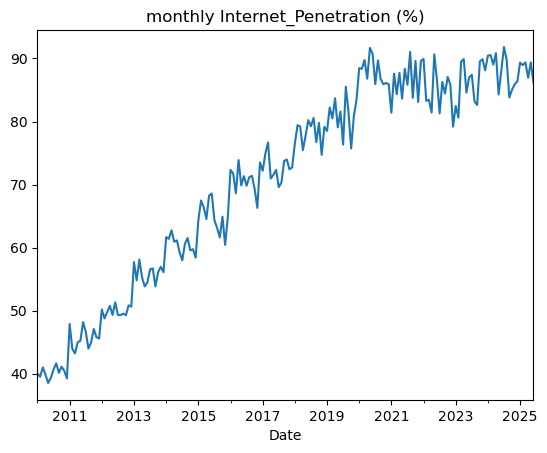

In [559]:
paises_desarollados_resampled['Internet_Penetration (%)'].plot(title='monthly Internet_Penetration (%)')

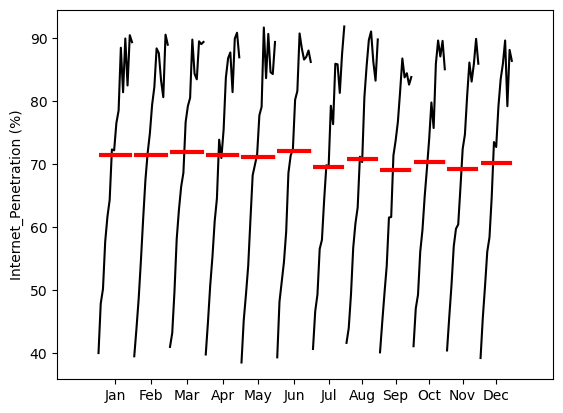

In [560]:
month_plot(paises_desarollados_resampled['Internet_Penetration (%)'].resample('ME').mean(),
          ylabel='Internet_Penetration (%)')
plt.show()

C:\Users\Nicol\AppData\Local\Temp\ipykernel_9952\3168862664.py:1: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.



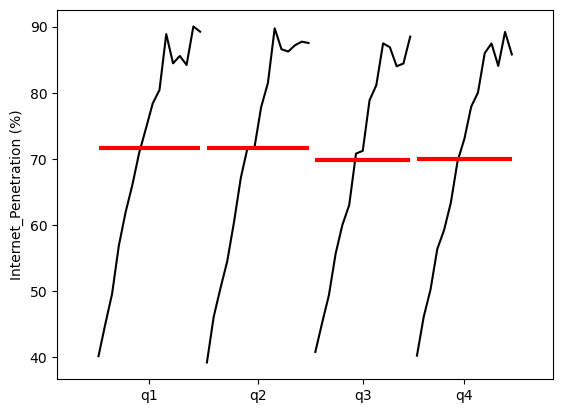

In [561]:
quarter_plot(paises_desarollados_resampled['Internet_Penetration (%)'].resample('Q').mean(),
          ylabel='Internet_Penetration (%)')
plt.show()

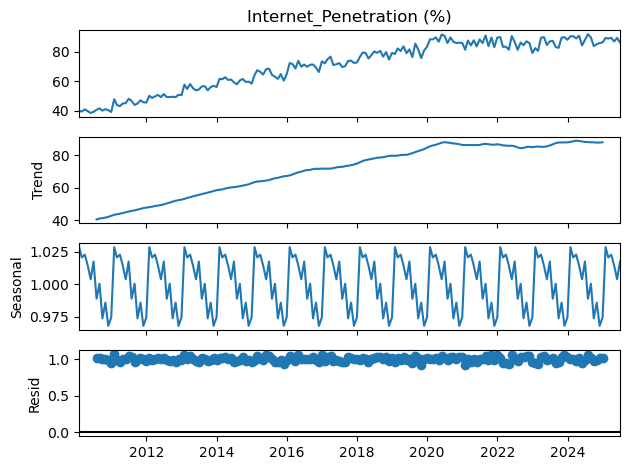

In [562]:
decomposition_mul=seasonal_decompose(paises_desarollados_resampled['Internet_Penetration (%)'],model='multiplicative',period=12)
fig=decomposition_mul.plot()

In [563]:
print(f'promedio residuales descompocision multiplicativa: {decomposition_mul.resid.mean()}')
print(f"Desviación estándar residuos multiplicativo: {decomposition_mul.resid.std()}")

promedio residuales descompocision multiplicativa: 1.0004132339494618
Desviación estándar residuos multiplicativo: 0.03075053708646519


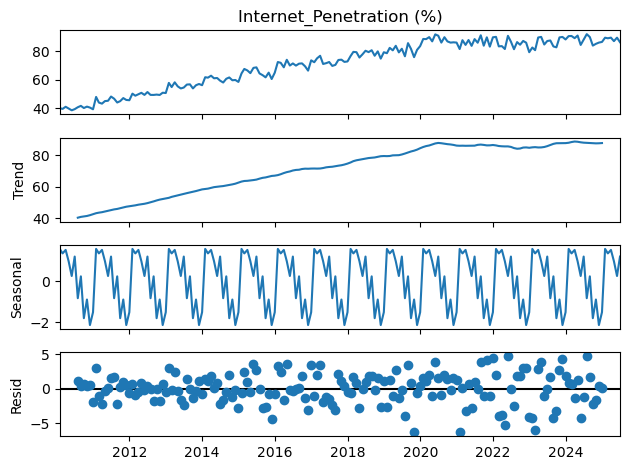

In [564]:
decomposition_add=seasonal_decompose(paises_desarollados_resampled['Internet_Penetration (%)'],model='additive',period=12)
fig=decomposition_add.plot()

In [565]:
print(f'promedio residuales descompocision aditiva: {decomposition_add.resid.mean()}')
print(f"Desviación estándar residuos aditivo: {decomposition_add.resid.std()}")

promedio residuales descompocision aditiva: 0.027562843116870586
Desviación estándar residuos aditivo: 2.2395614297248714


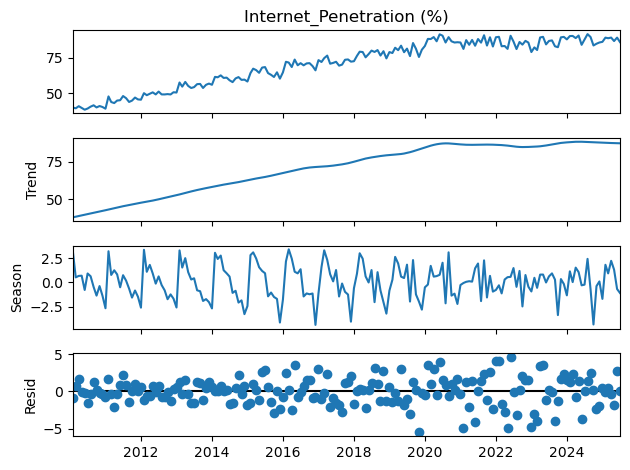

In [566]:
df_stl=STL(paises_desarollados_resampled['Internet_Penetration (%)'],period=12).fit()
fig=df_stl.plot()

In [567]:
print(f'promedio de resiudlaes STl:{df_stl.resid.mean()}')
print(f"Desviación estándar residuos stl: {df_stl.resid.std()}")

promedio de resiudlaes STl:0.022170077249001722
Desviación estándar residuos stl: 1.861508719208798


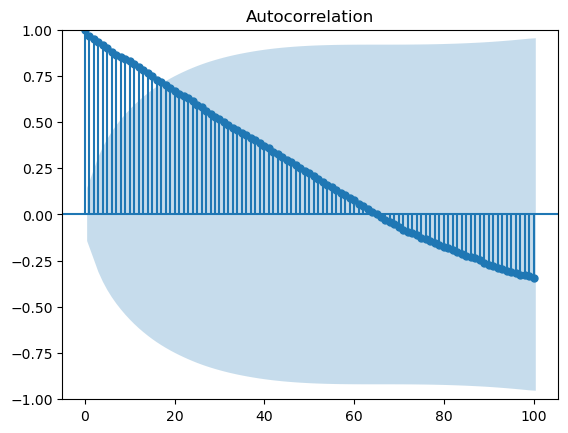

In [568]:
plot_acf(paises_desarollados_resampled['Internet_Penetration (%)'],lags=100)
plt.show()

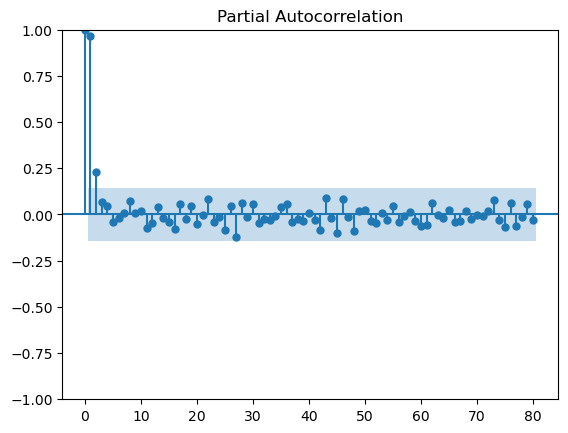

In [569]:
plot_pacf(paises_desarollados_resampled['Internet_Penetration (%)'],lags=80)
plt.show()

In [570]:
y=df['Internet_Penetration (%)']

variables_exogenas =df[['GDP_Per_Capita (USD)', 'Education_Level (%)', 'Mobile_Data_Usage (GB)',
       'Digital_Investment (M USD)','Digital_Literacy (%)','Broadband_Speed (Mbps)']]

In [571]:
from statsmodels.tsa.stattools import adfuller 


result = adfuller(df['Internet_Penetration (%)'])
print("p-value %f"%result[1]) # p-value result[1]

if result[1]<0.05:
    print("evidence suggests that the time series is stationary")
else:
    print("evidence suggests that the time series is not stationary ")

p-value 0.000078
evidence suggests that the time series is stationary


In [572]:
for var in variables_exogenas:
    serie = df[var]  
    resultado = adfuller(serie)

    print(f"\nVariable: {var}")
    print(f"  ➤ p-value: {resultado[1]:.6f}")
    
    if resultado[1] < 0.05:
        print("  ✅ Estacionaria (rechazamos H0)")
    else:
        print("  ❌ No estacionaria (no se puede rechazar H0)")



Variable: GDP_Per_Capita (USD)
  ➤ p-value: 0.043841
  ✅ Estacionaria (rechazamos H0)

Variable: Education_Level (%)
  ➤ p-value: 0.076786
  ❌ No estacionaria (no se puede rechazar H0)

Variable: Mobile_Data_Usage (GB)
  ➤ p-value: 0.000006
  ✅ Estacionaria (rechazamos H0)

Variable: Digital_Investment (M USD)
  ➤ p-value: 0.000017
  ✅ Estacionaria (rechazamos H0)

Variable: Digital_Literacy (%)
  ➤ p-value: 0.051079
  ❌ No estacionaria (no se puede rechazar H0)

Variable: Broadband_Speed (Mbps)
  ➤ p-value: 0.000010
  ✅ Estacionaria (rechazamos H0)


In [573]:
df['Education_Level (%)_dff']=df['Education_Level (%)'].diff()
df['Digital_Literacy (%)_dff']=df['Digital_Literacy (%)'].diff()
df=df.dropna()

In [574]:
df

,Country,Date,Internet_Penetration (%),Broadband_Speed (Mbps),GDP_Per_Capita (USD),Education_Level (%),Mobile_Data_Usage (GB),Digital_Investment (M USD),Digital_Literacy (%),X_Sentiment_Score,5G_Rollout,Urban_Rural,Latitude,Longitude,Year,Education_Level (%)_dff,Digital_Literacy (%)_dff
1,USA,2010-01-02,47.88,9.57,20332.14,46.71,0.54,441.28,85.41,-0.49,0,Urban,37.0902,-95.7129,2010,-0.46,0.12
2,USA,2010-01-03,46.46,9.71,20319.72,46.75,0.64,447.51,85.32,-0.24,0,Urban,37.0902,-95.7129,2010,0.04,-0.09
3,USA,2010-01-04,46.80,9.73,20334.79,47.09,0.53,438.25,85.23,-0.66,0,Urban,37.0902,-95.7129,2010,0.34,-0.09
4,USA,2010-01-05,46.91,9.71,20377.81,46.96,0.56,436.41,85.79,-0.21,0,Urban,37.0902,-95.7129,2010,-0.13,0.56
5,USA,2010-01-06,24.95,5.24,20385.63,46.67,0.33,436.77,85.37,0.21,0,Rural,37.0902,-95.7129,2010,-0.29,-0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56355,South Africa,2025-06-02,96.67,122.60,9927.28,38.71,10.27,1644.72,62.14,0.53,1,Urban,-30.5595,22.9375,2025,0.12,-0.53
56356,South Africa,2025-06-03,97.85,122.69,9987.56,39.21,10.45,1639.97,62.65,-0.60,1,Urban,-30.5595,22.9375,2025,0.50,0.51
56357,South Africa,2025-06-04,97.23,122.66,10046.64,39.06,10.27,1624.73,62.53,0.94,1,Urban,-30.5595,22.9375,2025,-0.15,-0.12
56358,South Africa,2025-06-05,97.30,122.69,10022.64,39.06,10.36,1645.58,62.41,-0.64,1,Urban,-30.5595,22.9375,2025,0.00,-0.12


In [575]:
variables_diferenciacion=df[['Education_Level (%)_dff','Digital_Literacy (%)_dff']]

In [576]:
for var in variables_diferenciacion:
    serie=df[var]
    resultado=adfuller(serie)
    
    print(f"\nVariable: {var}")
    print(f"  ➤ p-value: {resultado[1]:.6f}")
    
    if resultado[1] < 0.05:
        print("  ✅ Estacionaria (rechazamos H0)")
    else:
        print("  ❌ No estacionaria (no se puede rechazar H0)")
    


Variable: Education_Level (%)_dff
  ➤ p-value: 0.000000
  ✅ Estacionaria (rechazamos H0)

Variable: Digital_Literacy (%)_dff
  ➤ p-value: 0.000000
  ✅ Estacionaria (rechazamos H0)


In [577]:
variables_exogenas=df[['Education_Level (%)_dff','Digital_Literacy (%)_dff','GDP_Per_Capita (USD)', 'Mobile_Data_Usage (GB)',
       'Digital_Investment (M USD)','Broadband_Speed (Mbps)']]

In [578]:
# usando correlacion de series temporales "lags" para mirar las variables correlacionadas con internet adoption
 
from statsmodels.tsa.stattools import ccf

lags = 12  # Número de lags a evaluar

for var in variables_exogenas:
    ccf_values = ccf(y, df[var], adjusted=False)[:lags+1]  # Lags 0 a 12
    print(f"Correlación cruzada (y vs {var}):")
    for lag, corr in enumerate(ccf_values):
        print(f"Lag {lag}: {corr:.3f}")

Correlación cruzada (y vs Education_Level (%)_dff):
Lag 0: 0.009
Lag 1: 0.008
Lag 2: 0.009
Lag 3: 0.009
Lag 4: 0.011
Lag 5: 0.007
Lag 6: 0.008
Lag 7: 0.011
Lag 8: 0.006
Lag 9: 0.008
Lag 10: 0.011
Lag 11: 0.007
Lag 12: 0.008
Correlación cruzada (y vs Digital_Literacy (%)_dff):
Lag 0: 0.011
Lag 1: 0.010
Lag 2: 0.012
Lag 3: 0.010
Lag 4: 0.011
Lag 5: 0.011
Lag 6: 0.010
Lag 7: 0.011
Lag 8: 0.013
Lag 9: 0.011
Lag 10: 0.010
Lag 11: 0.014
Lag 12: 0.011
Correlación cruzada (y vs GDP_Per_Capita (USD)):
Lag 0: 0.381
Lag 1: 0.381
Lag 2: 0.381
Lag 3: 0.381
Lag 4: 0.380
Lag 5: 0.380
Lag 6: 0.380
Lag 7: 0.380
Lag 8: 0.380
Lag 9: 0.379
Lag 10: 0.379
Lag 11: 0.379
Lag 12: 0.379
Correlación cruzada (y vs Mobile_Data_Usage (GB)):
Lag 0: 0.936
Lag 1: 0.693
Lag 2: 0.689
Lag 3: 0.690
Lag 4: 0.689
Lag 5: 0.691
Lag 6: 0.689
Lag 7: 0.689
Lag 8: 0.688
Lag 9: 0.687
Lag 10: 0.686
Lag 11: 0.685
Lag 12: 0.686
Correlación cruzada (y vs Digital_Investment (M USD)):
Lag 0: 0.793
Lag 1: 0.792
Lag 2: 0.791
Lag 3: 0.791


In [579]:
#que tanto X ayuda a predecir *y* en contexto temporal:
from statsmodels.tsa.stattools import grangercausalitytests  

# Variable dependiente
y = 'Internet_Penetration (%)'

# Variables que podrían influir en y
variables_exogenas=['Education_Level (%)_dff','Digital_Literacy (%)_dff','GDP_Per_Capita (USD)', 'Mobile_Data_Usage (GB)',
       'Digital_Investment (M USD)','Broadband_Speed (Mbps)']
# Cuántos lags mirar
max_lag = 12

# Solo dejamos las columnas necesarias
datos = df[[y] + variables_exogenas]

# Revisamos una por una si la variable ayuda a predecir 'y'
for var in variables_exogenas:
    print(f"\n📊 ¿Puede '{var}' ayudar a predecir '{y}'?")
    
    # Ejecutamos el test
    resultado = grangercausalitytests(datos[[y, var]], maxlag=max_lag, verbose=False)
    
    # Mostramos los p-values para cada lag
    for lag in range(1, max_lag + 1):
        p = resultado[lag][0]['ssr_chi2test'][1]
        
        if p < 0.05:
            print(f"Lag {lag}: p = {p:.4f} ✅ Significativo")
        else:
            print(f"Lag {lag}: p = {p:.4f} ❌ No significativo")


📊 ¿Puede 'Education_Level (%)_dff' ayudar a predecir 'Internet_Penetration (%)'?


C:\Users\Nicol\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



Lag 1: p = 0.5275 ❌ No significativo
Lag 2: p = 0.0009 ✅ Significativo
Lag 3: p = 0.0000 ✅ Significativo
Lag 4: p = 0.0000 ✅ Significativo
Lag 5: p = 0.0000 ✅ Significativo
Lag 6: p = 0.0000 ✅ Significativo
Lag 7: p = 0.0000 ✅ Significativo
Lag 8: p = 0.0000 ✅ Significativo
Lag 9: p = 0.0000 ✅ Significativo
Lag 10: p = 0.0000 ✅ Significativo
Lag 11: p = 0.0000 ✅ Significativo
Lag 12: p = 0.0000 ✅ Significativo

📊 ¿Puede 'Digital_Literacy (%)_dff' ayudar a predecir 'Internet_Penetration (%)'?


C:\Users\Nicol\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



Lag 1: p = 0.4158 ❌ No significativo
Lag 2: p = 0.0016 ✅ Significativo
Lag 3: p = 0.0000 ✅ Significativo
Lag 4: p = 0.0000 ✅ Significativo
Lag 5: p = 0.0000 ✅ Significativo
Lag 6: p = 0.0000 ✅ Significativo
Lag 7: p = 0.0000 ✅ Significativo
Lag 8: p = 0.0000 ✅ Significativo
Lag 9: p = 0.0000 ✅ Significativo
Lag 10: p = 0.0000 ✅ Significativo
Lag 11: p = 0.0000 ✅ Significativo
Lag 12: p = 0.0000 ✅ Significativo

📊 ¿Puede 'GDP_Per_Capita (USD)' ayudar a predecir 'Internet_Penetration (%)'?


C:\Users\Nicol\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



Lag 1: p = 0.0000 ✅ Significativo
Lag 2: p = 0.0000 ✅ Significativo
Lag 3: p = 0.0000 ✅ Significativo
Lag 4: p = 0.0000 ✅ Significativo
Lag 5: p = 0.0000 ✅ Significativo
Lag 6: p = 0.0000 ✅ Significativo
Lag 7: p = 0.0000 ✅ Significativo
Lag 8: p = 0.0000 ✅ Significativo
Lag 9: p = 0.0000 ✅ Significativo
Lag 10: p = 0.0000 ✅ Significativo
Lag 11: p = 0.0000 ✅ Significativo
Lag 12: p = 0.0000 ✅ Significativo

📊 ¿Puede 'Mobile_Data_Usage (GB)' ayudar a predecir 'Internet_Penetration (%)'?


C:\Users\Nicol\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



Lag 1: p = 0.0000 ✅ Significativo
Lag 2: p = 0.0000 ✅ Significativo
Lag 3: p = 0.0000 ✅ Significativo
Lag 4: p = 0.0000 ✅ Significativo
Lag 5: p = 0.0000 ✅ Significativo
Lag 6: p = 0.0000 ✅ Significativo
Lag 7: p = 0.0001 ✅ Significativo
Lag 8: p = 0.0008 ✅ Significativo
Lag 9: p = 0.0035 ✅ Significativo
Lag 10: p = 0.0033 ✅ Significativo
Lag 11: p = 0.0014 ✅ Significativo
Lag 12: p = 0.0007 ✅ Significativo

📊 ¿Puede 'Digital_Investment (M USD)' ayudar a predecir 'Internet_Penetration (%)'?


C:\Users\Nicol\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



Lag 1: p = 0.0000 ✅ Significativo
Lag 2: p = 0.0000 ✅ Significativo
Lag 3: p = 0.0000 ✅ Significativo
Lag 4: p = 0.0000 ✅ Significativo
Lag 5: p = 0.0000 ✅ Significativo
Lag 6: p = 0.0000 ✅ Significativo
Lag 7: p = 0.0000 ✅ Significativo
Lag 8: p = 0.0000 ✅ Significativo
Lag 9: p = 0.0000 ✅ Significativo
Lag 10: p = 0.0000 ✅ Significativo
Lag 11: p = 0.0000 ✅ Significativo
Lag 12: p = 0.0000 ✅ Significativo

📊 ¿Puede 'Broadband_Speed (Mbps)' ayudar a predecir 'Internet_Penetration (%)'?


C:\Users\Nicol\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



Lag 1: p = 0.0000 ✅ Significativo
Lag 2: p = 0.0000 ✅ Significativo
Lag 3: p = 0.0000 ✅ Significativo
Lag 4: p = 0.0001 ✅ Significativo
Lag 5: p = 0.0022 ✅ Significativo
Lag 6: p = 0.0150 ✅ Significativo
Lag 7: p = 0.0727 ❌ No significativo
Lag 8: p = 0.0998 ❌ No significativo
Lag 9: p = 0.1809 ❌ No significativo
Lag 10: p = 0.0726 ❌ No significativo
Lag 11: p = 0.1164 ❌ No significativo
Lag 12: p = 0.1466 ❌ No significativo


In [580]:
df.columns

Index(['Country', 'Date', 'Internet_Penetration (%)', 'Broadband_Speed (Mbps)',
       'GDP_Per_Capita (USD)', 'Education_Level (%)', 'Mobile_Data_Usage (GB)',
       'Digital_Investment (M USD)', 'Digital_Literacy (%)',
       'X_Sentiment_Score', '5G_Rollout', 'Urban_Rural', 'Latitude',
       'Longitude', 'Year', 'Education_Level (%)_dff',
       'Digital_Literacy (%)_dff'],
      dtype='object')

In [581]:
n

10

#### predecir la adopcion de internet  para los proximos meses  "SARIMAX"

In [583]:
# para el autoarima y el sarimax no se necesita diferenciacion ya que auto_arima lo hace por si solo

from pmdarima import auto_arima

# 1. Cargar y limpiar
df = pd.read_csv('global_internet_adoption_daily_2010_2025.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 2. Mantener columnas necesarias 
df = df[['Internet_Penetration (%)', 
         'Mobile_Data_Usage (GB)', 
         'Digital_Investment (M USD)', 
         'Broadband_Speed (Mbps)']]

# 3. Resamplear a mensual (fin de mes) usando media
df_resampled = df.resample('ME').mean().dropna()

# 4. Separar variable dependiente y exógenas
y = df_resampled['Internet_Penetration (%)']
X = df_resampled.drop(columns='Internet_Penetration (%)')

# 5. Dividir en train/test
n_test = 12
y_train, y_test = y[:-n_test], y[-n_test:]
X_train, X_test = X[:-n_test], X[-n_test:]



In [584]:
# auto_arima para mirar los mejores parametros
stepwise_model = auto_arima(y_train,
                            exogenous=X_train,
                            m=12,  
                            seasonal=True,
                            trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=668.083, Time=2.17 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=718.858, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=702.331, Time=1.32 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=710.133, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=723.291, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=710.071, Time=1.60 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=701.872, Time=1.59 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=660.619, Time=3.67 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=5.37 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=663.128, Time=5.12 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=659.771, Time=3.75 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=2.75 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=659.765, Time=5.87 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=2.39 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=66

In [585]:
# 13. Extraer parámetros
order = stepwise_model.order
seasonal_order = stepwise_model.seasonal_order

In [586]:
model = SARIMAX(y_train,
                exog=X_train,
                order=order,
                seasonal_order=seasonal_order)

model_fit = model.fit(disp=False)

In [587]:
print(model_fit.summary())

                                        SARIMAX Results                                        
Dep. Variable:                Internet_Penetration (%)   No. Observations:                  174
Model:             SARIMAX(0, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood                -269.759
Date:                                 Sat, 19 Jul 2025   AIC                            555.518
Time:                                         00:02:39   BIC                            580.744
Sample:                                     01-31-2010   HQIC                           565.752
                                          - 06-30-2024                                         
Covariance Type:                                   opg                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Mobile_Data_Usage (GB)        13.1334     

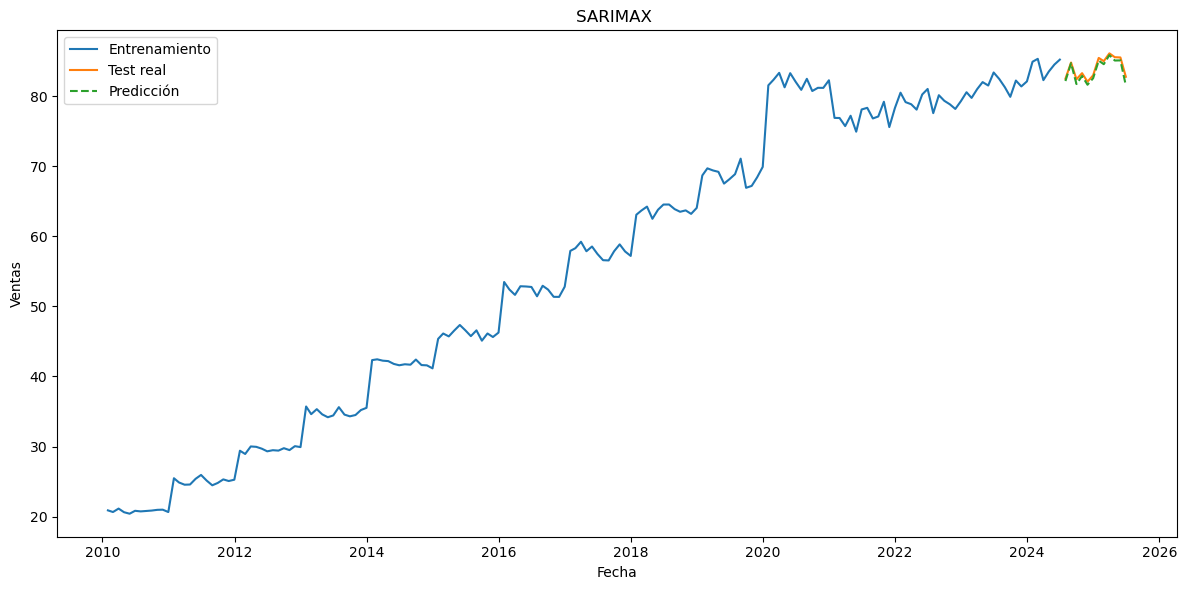

the mae is 0.4630421662744884
the mape is 0.55%
the rmse is 0.54%


In [588]:
# 15. Predecir sobre el conjunto de prueba
y_pred = model_fit.predict(start=y_test.index[0],
                           end=y_test.index[-1],
                           exog=X_test)

# 17. Graficar resultados
plt.figure(figsize=(12,6))
plt.plot(y_train, label='Entrenamiento')
plt.plot(y_test, label='Test real')
plt.plot(y_pred, label='Predicción', linestyle='--')
plt.title('SARIMAX ')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.tight_layout()
plt.savefig('prediccion_sarimax.png', dpi=300, bbox_inches='tight')
plt.show()

mae=mean_absolute_error(y_test,y_pred)
print(f'the mae is {mae}')

mape=mean_absolute_percentage_error(y_test,y_pred)
print(f'the mape is {100*mape:.2f}%')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'the rmse is {rmse:.2f}%')

In [589]:
print(type(model_fit))

<class 'statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper'>


In [590]:
y_train_pred = model_fit.predict(start=y_train.index[0],
                                 end=y_train.index[-1],
                                 exog=X_train)

In [591]:
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
print(f'MAPE train: {100 * mape_train:.2f}%')

MAPE train: 1.78%


In [592]:
print(f"Desviación estándar train: {y_train.std():.4f}")
print(f"Desviación estándar test: {y_test.std():.4f}")

Desviación estándar train: 21.3622
Desviación estándar test: 1.4955


##### El modelo SARIMAX con exógenas muestra un MAPE en test (0.55%) inferior al de train (1.78%) debido a que los últimos 12 meses presentaron una volatilidad significativamente menor (std_test = 1.9 vs. std_train = 20.3). Esto no indica sobreajuste, sino que el período de prueba fue intrínsecamente más predecible.

In [594]:
tscv = TimeSeriesSplit(n_splits=5)

print("🔄 Rolling Window Results:\n")

for i, (train_idx, test_idx) in enumerate(tscv.split(y)):
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]

    model = SARIMAX(y_train,
                    exog=X_train,
                    order=order,
                    seasonal_order=seasonal_order)

    model_fit = model.fit(disp=False)

    y_pred = model_fit.predict(start=y_test.index[0],
                               end=y_test.index[-1],
                               exog=X_test)

    mape = mean_absolute_percentage_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"Rolling Split {i+1} - MAPE: {mape:.2%} | MAE: {mae:.2f} | RMSE: {rmse:.2f}")

🔄 Rolling Window Results:



C:\Users\Nicol\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



Rolling Split 1 - MAPE: 5.74% | MAE: 2.33 | RMSE: 2.87


C:\Users\Nicol\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\Nicol\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Nicol\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Rolling Split 2 - MAPE: 1.45% | MAE: 0.78 | RMSE: 0.91


C:\Users\Nicol\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Nicol\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



Rolling Split 3 - MAPE: 1.51% | MAE: 1.17 | RMSE: 2.40


C:\Users\Nicol\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Rolling Split 4 - MAPE: 12.57% | MAE: 9.84 | RMSE: 11.61
Rolling Split 5 - MAPE: 9.21% | MAE: 7.69 | RMSE: 8.20


In [595]:
tscv = TimeSeriesSplit(n_splits=5)

for i, (train_idx, test_idx) in enumerate(tscv.split(df_resampled)):
    train_start = df_resampled.index[train_idx[0]]
    train_end = df_resampled.index[train_idx[-1]]
    test_start = df_resampled.index[test_idx[0]]
    test_end = df_resampled.index[test_idx[-1]]
    
    print(f"🔁 Split {i+1}")
    print(f"   - Train: {train_start.date()} → {train_end.date()} ({len(train_idx)} semanas)")
    print(f"   - Test:  {test_start.date()} → {test_end.date()} ({len(test_idx)} semanas)\n")

🔁 Split 1
   - Train: 2010-01-31 → 2012-07-31 (31 semanas)
   - Test:  2012-08-31 → 2015-02-28 (31 semanas)

🔁 Split 2
   - Train: 2010-01-31 → 2015-02-28 (62 semanas)
   - Test:  2015-03-31 → 2017-09-30 (31 semanas)

🔁 Split 3
   - Train: 2010-01-31 → 2017-09-30 (93 semanas)
   - Test:  2017-10-31 → 2020-04-30 (31 semanas)

🔁 Split 4
   - Train: 2010-01-31 → 2020-04-30 (124 semanas)
   - Test:  2020-05-31 → 2022-11-30 (31 semanas)

🔁 Split 5
   - Train: 2010-01-31 → 2022-11-30 (155 semanas)
   - Test:  2022-12-31 → 2025-06-30 (31 semanas)

